# Thư viện

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.api.preprocessing.image import load_img
from keras.api.models import Model
from keras.api.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, Input
from PIL import Image
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

# Xử lý dữ liệu

In [2]:
datasetPath = "data/UTKFace"

In [3]:
dataList = os.listdir(datasetPath)

In [4]:
np.random.shuffle(dataList)

In [5]:
ages = list()
gender = list()

for filename in tqdm(dataList):
    dataName = filename.split('_')
    ages.append(int(dataName[0]))
    gender.append(int(dataName[1]))

  0%|          | 0/23708 [00:00<?, ?it/s]

In [6]:
df = pd.DataFrame({"image": dataList , "age": ages, "gender": gender})

In [7]:
df

,image,age,gender
0,2_1_3_20161219225825224.jpg.chip.jpg,2,1
1,8_1_3_20161220220642802.jpg.chip.jpg,8,1
2,45_1_0_20170103163311263.jpg.chip.jpg,45,1
3,1_0_0_20161219205817093.jpg.chip.jpg,1,0
4,35_1_0_20170117170842874.jpg.chip.jpg,35,1
...,...,...,...
23703,22_0_0_20170104002331117.jpg.chip.jpg,22,0
23704,44_0_3_20170119150719334.jpg.chip.jpg,44,0
23705,48_0_1_20170113185049416.jpg.chip.jpg,48,0
23706,18_1_2_20170103223049176.jpg.chip.jpg,18,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   23708 non-null  object
 1   age     23708 non-null  int64 
 2   gender  23708 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 555.8+ KB


In [8]:
df.describe()

,age,gender
count,23708.000000,23708.000000
mean,33.303484,0.477349
std,19.886112,0.499497
min,1.000000,0.000000
25%,23.000000,0.000000
50%,29.000000,0.000000
75%,45.000000,1.000000
max,116.000000,1.000000


In [9]:
genderDict = {0: "Nam", 1: "Nữ"}

In [10]:
df.dtypes

image     object
age        int64
gender     int64
dtype: object

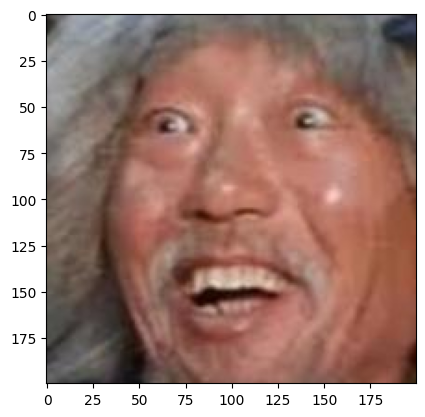

In [11]:
img = Image.open(f"{datasetPath}/{df.iloc[0, 0]}")
plt.imshow(img)

In [12]:
trainDataset, testDataset = train_test_split(df, train_size=0.8, random_state=42)

In [77]:
trainDataset

,image,age,gender
5096,35_0_1_20170117104607288.jpg.chip.jpg,35,0
19586,26_1_2_20170104022244853.jpg.chip.jpg,26,1
9835,21_1_2_20170109132112364.jpg.chip.jpg,21,1
13631,35_1_2_20170116165645870.jpg.chip.jpg,35,1
9807,34_0_4_20170117105033191.jpg.chip.jpg,34,0
...,...,...,...
21575,20_1_4_20170103225149441.jpg.chip.jpg,20,1
5390,1_1_2_20161219210324181.jpg.chip.jpg,1,1
860,38_1_1_20170116223105812.jpg.chip.jpg,38,1
15795,27_0_0_20170105164547923.jpg.chip.jpg,27,0


In [78]:
testDataset

,image,age,gender
17525,45_0_3_20170119200658085.jpg.chip.jpg,45,0
1147,31_0_1_20170116024204398.jpg.chip.jpg,31,0
1190,40_1_4_20170117200930685.jpg.chip.jpg,40,1
9731,36_1_4_20170112233252616.jpg.chip.jpg,36,1
7387,61_0_2_20170104210058436.jpg.chip.jpg,61,0
...,...,...,...
16272,26_1_0_20170117173257366.jpg.chip.jpg,26,1
4153,43_1_4_20170117185935802.jpg.chip.jpg,43,1
2943,29_1_1_20170112235043081.jpg.chip.jpg,29,1
18613,26_1_4_20170117201458974.jpg.chip.jpg,26,1


In [13]:
df.nunique()

image     23708
age         104
gender        2
dtype: int64

In [14]:
trainDataset.nunique()

image     18966
age         104
gender        2
dtype: int64

In [15]:
testDataset.nunique()

image     4742
age         99
gender       2
dtype: int64

# Trích xuất thuộc tính

In [ ]:
xTrain = list()
for image in tqdm(trainDataset['image']):
    img = load_img(f"{datasetPath}/{image}")
    img = img.resize((128, 128), Image.Resampling.LANCZOS)
    img = np.array(img)
    xTrain.append(img)
    
xTrain = np.array(xTrain)
xTrain = xTrain.reshape(len(xTrain), 128, 128, 3)

  0%|          | 0/18966 [00:00<?, ?it/s]

In [18]:
xTrain

array([[[[ 75,  62,  46],
         [ 76,  61,  45],
         [ 73,  56,  43],
         ...,
         [243, 230, 215],
         [240, 227, 208],
         [241, 226, 203]],

        [[ 68,  52,  37],
         [ 66,  51,  35],
         [ 64,  47,  33],
         ...,
         [246, 233, 218],
         [245, 231, 213],
         [245, 231, 208]],

        [[ 62,  46,  29],
         [ 59,  43,  27],
         [ 57,  40,  25],
         ...,
         [249, 237, 221],
         [249, 236, 216],
         [250, 235, 211]],

        ...,

        [[ 60,  58,  69],
         [ 68,  66,  77],
         [ 65,  64,  74],
         ...,
         [ 55,  53,  90],
         [ 58,  56,  97],
         [ 59,  58, 102]],

        [[ 56,  55,  69],
         [ 73,  70,  85],
         [ 75,  73,  87],
         ...,
         [ 55,  53,  90],
         [ 58,  56,  97],
         [ 59,  58, 102]],

        [[ 59,  57,  72],
         [ 62,  59,  76],
         [ 72,  69,  85],
         ...,
         [ 55,  53,  90],
        

## Chuẩn hóa

In [ ]:
xTrain = xTrain/255

In [20]:
yGender = np.array(trainDataset["gender"])
yAge = np.array(trainDataset["age"])

# Mô hình CNN

In [21]:
inputSize = Input(shape=(128, 128, 3))
M = Conv2D(64, (3, 3), activation='relu')(inputSize)
M = BatchNormalization(axis=3)(M)
M = MaxPooling2D((3, 3))(M)
M = Conv2D(128, (3, 3), activation='relu')(M)
M = MaxPooling2D(strides=(2, 2))(M)
M = Conv2D(256, (3, 3), activation='relu')(M)
M = MaxPooling2D()(M)

M = Flatten()(M)

dense1 = Dense(256, activation='relu')(M)
dense2 = Dense(256, activation='relu')(M)
dense3 = Dense(128, activation='relu')(dense2)

dropout1 = Dropout(0.4)(dense1)
dropout2 = Dropout(0.4)(dense3)

outputGender = Dense(1, activation='sigmoid', name="genderOutput")(dropout1)
outputAge = Dense(1, activation='relu', name="ageOutput")(dropout2)

model = Model(inputs=[inputSize], outputs=[outputGender, outputAge])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 126, 126,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 42, 42,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 40, 40,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 20, 20,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 18, 18,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 9, 9, 256) │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 20736)     │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │  5,308,672 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  5,308,672 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     32,896 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ genderOutput        │ (None, 1)         │        257 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ageOutput (Dense)   │ (None, 1)         │        129 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,021,698 (42.04 MB)

 Trainable params: 11,021,570 (42.04 MB)

 Non-trainable params: 128 (512.00 B)

In [22]:
model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

## Huấn luyện mô hình

In [24]:
modelCNN = model.fit(x=xTrain, y=[yGender, yAge], batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10


C:\Users\lechu\AppData\Roaming\Python\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


475/475 ━━━━━━━━━━━━━━━━━━━━ 886s 2s/step - ageOutput_loss: 15.9908 - ageOutput_mae: 15.9908 - genderOutput_accuracy: 0.6860 - genderOutput_loss: 1.0179 - loss: 17.0087 - val_ageOutput_loss: 18.6129 - val_ageOutput_mae: 18.6063 - val_genderOutput_accuracy: 0.7844 - val_genderOutput_loss: 0.4856 - val_loss: 19.0916
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 816s 2s/step - ageOutput_loss: 10.1308 - ageOutput_mae: 10.1307 - genderOutput_accuracy: 0.8269 - genderOutput_loss: 0.3785 - loss: 10.5092 - val_ageOutput_loss: 11.1284 - val_ageOutput_mae: 11.1274 - val_genderOutput_accuracy: 0.8508 - val_genderOutput_loss: 0.3278 - val_loss: 11.4547
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 891s 2s/step - ageOutput_loss: 8.9954 - ageOutput_mae: 8.9954 - genderOutput_accuracy: 0.8497 - genderOutput_loss: 0.3311 - loss: 9.3264 - val_ageOutput_loss: 9.5857 - val_ageOutput_mae: 9.5910 - val_genderOutput_accuracy: 0.8606 - val_genderOutput_loss: 0.3224 - val_loss: 9.9129
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━

## Xây dựng biểu đồ hàm mất mát

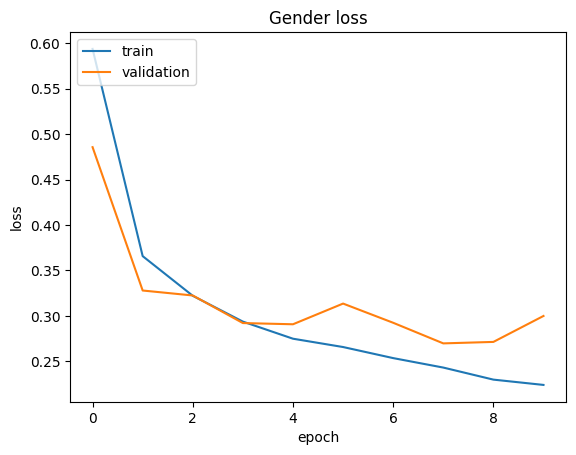

In [25]:
plt.plot(modelCNN.history['genderOutput_loss'])
plt.plot(modelCNN.history['val_genderOutput_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

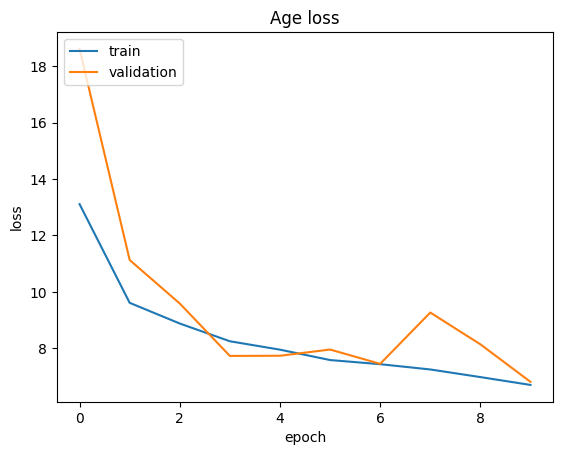

In [26]:
plt.plot(modelCNN.history['ageOutput_loss'])
plt.plot(modelCNN.history['val_ageOutput_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Biểu đồ độ chính xác

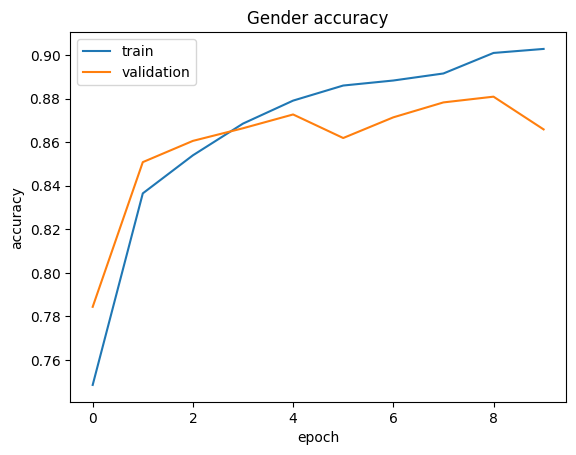

In [27]:
plt.plot(modelCNN.history['genderOutput_accuracy'])
plt.plot(modelCNN.history['val_genderOutput_accuracy'])
plt.title('Gender accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [53]:
import random

### Dùng mô hình dự đoán

Original: Gender =  Nam  Age =  28
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prediction: Gender =  Nam  Age =  30


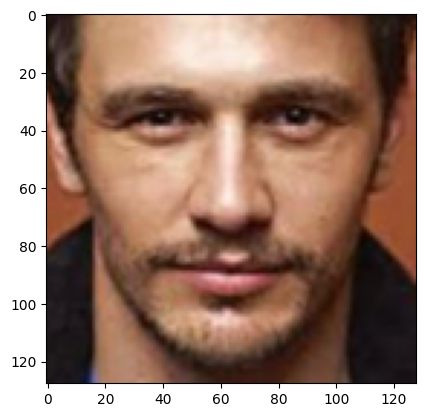

In [81]:
index=random.randint(0,10000)
print("Original: Gender = ", genderDict[yGender[index]]," Age = ", yAge[index])

pred = model.predict(xTrain[index].reshape(1, 128, 128, 3))
pred_gender = genderDict[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(xTrain[index].reshape(128,128, 3))

## Xử lý dữ liệu của bộ dữ liệu kiểm thử

In [102]:
xTest = list()
for image in tqdm(testDataset['image']):
    img = load_img(f"{datasetPath}/{image}")
    img = img.resize((128, 128), Image.Resampling.LANCZOS)
    img = np.array(img)
    xTest.append(img)
    
xTest = np.array(xTest)
xTest = xTest.reshape(len(xTest), 128, 128, 3)

xTest = xTest/255

yGenderTest = np.array(testDataset["gender"])
yAgeTest = np.array(testDataset["age"])

  0%|          | 0/4742 [00:00<?, ?it/s]

## Tính toán độ chính xác và hàm mất mát trên bộ dữ liệu kiểm thử

In [103]:
test_loss, test_gender_loss, test_age_loss, test_gender_accuracy, test_age_mae = model.evaluate(xTest, [yGenderTest, yAgeTest], verbose=0)

print(f"Test Gender Loss: {test_gender_loss}")
print(f"Test Age Loss: {test_age_loss}")
print(f"Test Gender Accuracy: {test_gender_accuracy}")
print(f"Test Age MAE: {test_age_mae}")

Test Gender Loss: 0.30355405807495117
Test Age Loss: 6.690582275390625
Test Gender Accuracy: 6.70468282699585
Test Age MAE: 0.8618726134300232


## Lưu mô hình

In [ ]:
model.save("model.keras")